<a href="https://colab.research.google.com/github/SUHANI-21/MachineLearningLab/blob/main/BDT_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bayesian Classification Accuracy: 71.11%


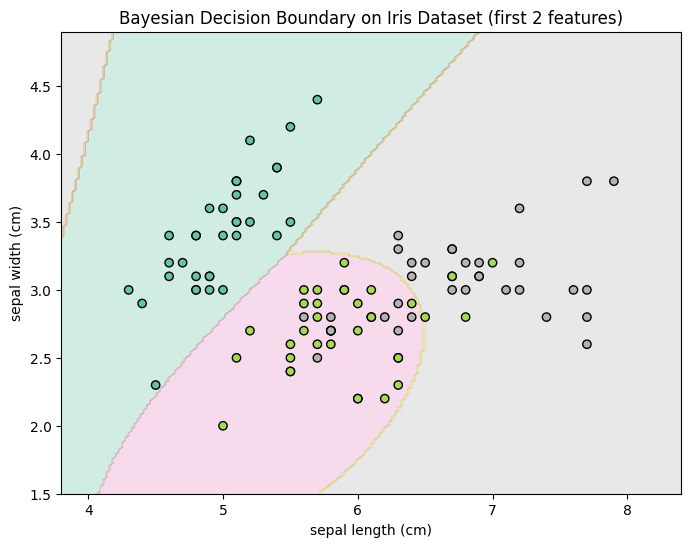

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
class_labels = iris.target_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


classes = np.unique(y_train)
priors = [np.mean(y_train == c) for c in classes]


means = [X_train[y_train == c].mean(axis=0) for c in classes]
covs = [np.cov(X_train[y_train == c].T) for c in classes]


def predict_bayes(X):
    posteriors = []
    for c in classes:
        likelihood = multivariate_normal.pdf(X, mean=means[c], cov=covs[c])
        posterior = likelihood * priors[c]
        posteriors.append(posterior)
    posteriors = np.array(posteriors)
    return np.argmax(posteriors, axis=0)

y_pred = predict_bayes(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Bayesian Classification Accuracy: {accuracy*100:.2f}%")


x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict_bayes(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set2)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Set2, edgecolor='k')
plt.title("Bayesian Decision Boundary on Iris Dataset (first 2 features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
